## Tensor Try

In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
a = np.zeros((2,2))
b = np.ones((2,2))

In [4]:
tf.InteractiveSession()

In [5]:
a = tf.zeros((2,2))

In [6]:
tf.reduce_sum(a, reduction_indices=1).eval()

array([ 0.,  0.], dtype=float32)

In [7]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [8]:
ta=tf.zeros((2,2))

In [9]:
print(ta)

Tensor("zeros_1:0", shape=(2, 2), dtype=float32)


In [10]:
ta = tf.zeros((2,2),name="ta")

In [11]:
ta

<tf.Tensor 'ta:0' shape=(2, 2) dtype=float32>

In [12]:
print(ta).eval()

[[ 0.  0.]
 [ 0.  0.]]


In [13]:
a = tf.Variable(5.0)
b = tf.Variable(6.0)
c = a * b
with tf.Session() as sess:
    print(c)
    sess.run(tf.initialize_all_variables())
    print(sess.run(c))

Tensor("mul:0", shape=(), dtype=float32)
Instructions for updating:
Use `tf.global_variables_initializer` instead.
30.0


In [14]:
W1 = tf.ones([2,2])
W2 = tf.Variable( tf.zeros([2,2]), name='weights')

In [15]:
isess = tf.get_default_session()
isess.run(tf.global_variables_initializer())

In [16]:
print(W2.eval())

[[ 0.  0.]
 [ 0.  0.]]


In [17]:
a = np.zeros([3,3])
ta = tf.convert_to_tensor(a)
ta

<tf.Tensor 'Const:0' shape=(3, 3) dtype=float64>

In [18]:
b = [ 1,2,3]
tb = tf.convert_to_tensor(b)
tb

<tf.Tensor 'Const_1:0' shape=(3,) dtype=int32>

In [19]:
isess.run(tb)

array([1, 2, 3], dtype=int32)

In [20]:
a = [ 1,2,3] 
b = [[1],[2]]


In [21]:
ta = tf.convert_to_tensor(a)
tb = tf.convert_to_tensor(b)

In [22]:
out = ta * tb

In [27]:
out = tb * ta

In [28]:
help(tf.get_variable)

Help on function get_variable in module tensorflow.python.ops.variable_scope:

get_variable(name, shape=None, dtype=None, initializer=None, regularizer=None, trainable=True, collections=None, caching_device=None, partitioner=None, validate_shape=True, custom_getter=None)
    Gets an existing variable with these parameters or create a new one.
    
    This function prefixes the name with the current variable scope
    and performs reuse checks. See the
    [Variable Scope How To](../../how_tos/variable_scope/index.md)
    for an extensive description of how reusing works. Here is a basic example:
    
    ```python
    with tf.variable_scope("foo"):
        v = tf.get_variable("v", [1])  # v.name == "foo/v:0"
        w = tf.get_variable("w", [1])  # w.name == "foo/w:0"
    with tf.variable_scope("foo", reuse=True)
        v1 = tf.get_variable("v")  # The same as v above.
    ```
    
    If initializer is `None` (the default), the default initializer passed in
    the variable scope wi

In [37]:
with tf.variable_scope('foo'):
    tf.get_variable_scope().reuse_variables()
    v = tf.get_variable('v',[1])
print(v.name)

foo/v:0


## Linear Regression in Tensorflow

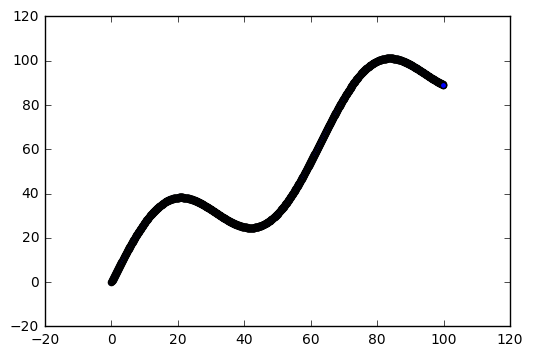

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
X_data = np.arange(100,step=0.1)
y_data = X_data + 20 * np.sin(X_data/10)
plt.scatter(X_data,y_data)


In [40]:
n_samples = 1000
batch_size = 100

print(X_data.shape)
print(y_data.shape)

#Tensorflow is finicky about shapes
X_data = np.reshape(X_data, (n_samples,1))
y_data = np.reshape(y_data, (n_samples,1))

print(X_data.shape)
print(y_data.shape)

#Define placeholders
X = tf.placeholder(tf.float32, shape=(batch_size,1))
y = tf.placeholder(tf.float32, shape=(batch_size,1))



(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


In [41]:
#Define variables
with tf.variable_scope('linear-regression'):
    W=tf.get_variable('weights',(1,1),initializer=tf.random_normal_initializer())
    b = tf.get_variable('bias',(1,),initializer = tf.constant_initializer(0.0))
    y_pred = tf.matmul(X,W) + b
    loss = tf.reduce_mean((y-y_pred)**2/n_samples)

In [42]:
#Gradient descent optimization of loss function
opt = tf.train.AdamOptimizer()
opt_op = opt.minimize(loss)

In [62]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for _ in range(10000):
        indices = np.random.choice(n_samples,batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        _,loss_val = sess.run([opt_op,loss],feed_dict={X:X_batch, y:y_batch})
    W_final = sess.run(W)
    bias_final = sess.run(b)
print(W_final)
print(bias_final)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[[ 1.00047052]]
[ 3.14767528]


In [63]:
y_regr = X_data * W_final + bias_final

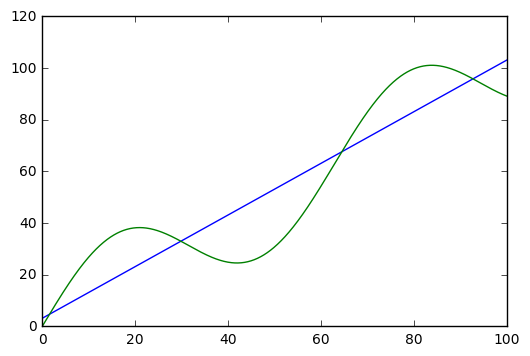

In [64]:
plt.plot(X_data,y_regr,X_data,y_data)